# 降维算法学习

为何要降维？
- 高维情形下往往会面临数据样本稀疏、距离计算困难等问题，也就是所谓的维度灾难

为何能够降维？
- 很多时候人们观测到的高维数据，其实和机器学习任务密切相关的仅仅是其某个低维分布，即高维空间中的一个低维“嵌入”(embedding)


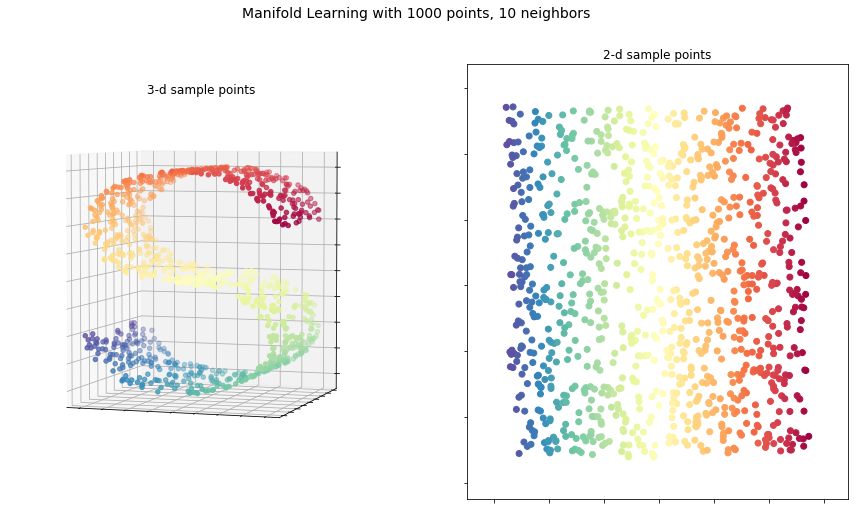

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title('3-d sample points')
ax.view_init(4, -72)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.zaxis.set_major_formatter(NullFormatter())


Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method='ltsa').fit_transform(X)


ax = fig.add_subplot(122)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_title('2-d sample points')
plt.axis('tight')

plt.show()

## 多维缩放算法(Multiple Dimensional Scaling, MDS)

### 算法思想

降维前后，任意两点之间的欧式距离不变。

### 算法推导

假定：

| 名称                     | 符号                            |
| ---------------------- | ----------------------------- |
| 样本数量                   | m                             |
| 原始空间距离矩阵               | \\(D \in R^{m \times m}\\)      |
| 样本\\(x_i\\) 到 \\(x_j\\)的距离 | \\(dist_{ij}\\)                 |
| 降维后的维度                 | \\(d^` \le d \\)               |
| 降维后的坐标矩阵               | \\(Z \in R^{d^` \times m}\\)    |
| 降维后的坐标的内积矩阵               | \\( B=Z^TZ \in R^{m \times m} \\)|



$$b_{ij}=z_i^Tz_j$$

$$dist_{ij}^2 = ||z_i||^2+||z_j||^2-2z_i^Tz_j =b_{ii}+b_{jj}-2b_{ij}$$



由于变换后 我们不关心样本的绝对位置，而是关注样本间的相对位置，因此样本的整体平移不会产生影响。为了方便讨论，令Z去中心化，即\\(\sum_{i=1}^{m}=0\\)。进而可以得到：
$$
\sum_{i=1}^mb_{ij}=\sum_{j=1}^mb_{ij}=0  \\
\Rightarrow \\
\sum_{i=1}^mdist_{ij}^2=tr(B)+mb_{jj} \\
\sum_{j=1}^mdist_{ij}^2=tr(B)+mb_{ii} \\
\sum_{i=1}^m\sum_{j=1}^mdist_{ij}^2=2m \; tr(B)
$$
记：
$$
dist_{i·}^2=\frac {1}{m}\sum_{j=1}^mdist_{ij}^2 \\
dist_{·j}^2=\frac {1}{m}\sum_{i=1}^mdist_{ij}^2 \\
dist_{··}^2=\frac {1}{m^2}\sum_{i=1}^m\sum_{j=1}^mdist_{ij}^2 \\
$$
进而得到：
$$
b_{ij}=-\frac {1}{2}(dist_{ij}^2-dist_{i·}^2-dist_{·j}^2+dist_{··}^2)
$$
因此可以通过D来求出B，对B进行特征值分解得到：
$$
B=V \Lambda V^T \\
= V \Lambda^{1/2}\Lambda^{1/2} V^T \\
$$
因此\\(Z=\Lambda^{1/2} V^T\\)。但是实际应用中，为了降维，不需要严格保证降维前后样本点间的距离相等，只需要尽量接近即可，这里选择B的\\(d`\\)个最大特征值构成对角矩阵\\(  \tilde{\Lambda}=diag(\lambda_1,\lambda_2,...\lambda_{d`}) \\)，令\\(\tilde{V}\\)表示对应的特征向量，则

$$Z=\tilde{\Lambda^{1/2}} \tilde{V^T}$$

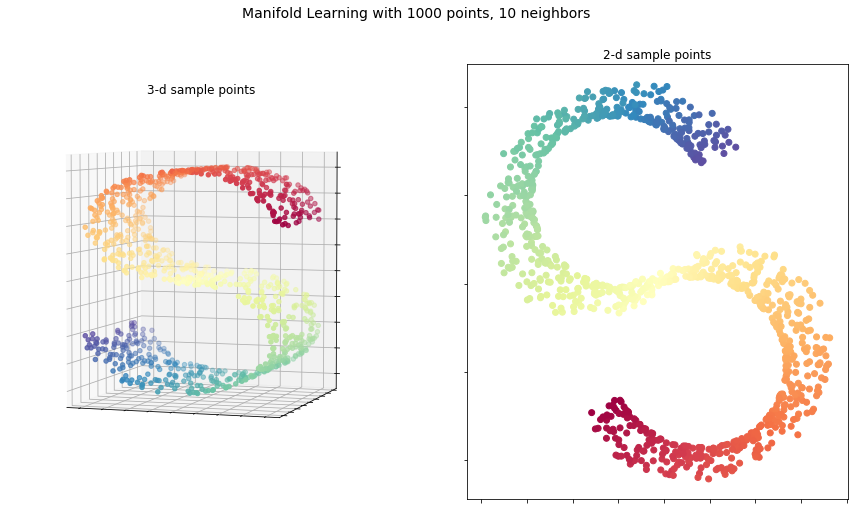

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title('3-d sample points')
ax.view_init(4, -72)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.zaxis.set_major_formatter(NullFormatter())


mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)


ax = fig.add_subplot(122)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_title('2-d sample points')
plt.axis('tight')

plt.show()
 


## 主成份分析(PCA)

PCA是一种常用的线性降维方法，用于将高维数据映射到 低维的 一个超平面上面。映射过程中需要保持的性质有两种等价的描述：

1. 最近重构性：样本点到这个超平面的距离足够近
2. 最大可分性：样本点在这个超平面上的投影尽可能的分开(方差尽可能的大)

下面通过推导来说明上面两种描述会得到相同的结果。

### 最近重构性推导

#### 算法假设：
由于样本点的平移不影响样本结构的分析及降维，因此后续时常会假设对样本进行了去中心化，即\\(\Sigma_ix_i=0\\)
映射得到的新维度坐标系为\\({w_1,w_2,...,w_d}\\)，里面的\\(w_i\\)是标准正交基向量，满足
$$
||w_i||_2=1 \\
w_i^Tw_j=0  \quad i \ne j
$$
若丢弃新坐标系中的一些不重要的维度，则可以将维度降到\\(d^` \lt d\\)。记样本点\\(x_i\\)在新坐标系中的投影是\\(z_i =(z_{i1},z_{i2},...,z_{id^`})\\)，其中\\(z_{ij}=w_j^Tx_i\\)就是样本点\\(x_i\\)在低维坐标系下第j维的坐标。如果用\\(z_i\\)来重建\\(x_i\\)，则\\(\hat{x_i}=\sum_{j=1}^{d^`}z_{ij}w_j\\)

$$
\sum_{i=1}^m||\sum_{j=1}^{d^`}z_{ij}w_j-x_i||_2^2=\sum_{i=1}^mz_i^Tz_i-2\sum_{i=1}^mz_i^TW^Tx_i+const \\
\propto  -tr(W^T(\sum_{i=1}^mx_ix_i^T)W)
$$
因此，优化目标就是：
$$
min -tr(W^TXX^TW) \\
s.t. W^TW=I
$$

### 最大可分性推导
如前所述，样本点\\(x_i\\)在新空间中的超平面上的投影是\\(W^Tx_i\\)，为了满足最大可分性，其实就是使得投影后的样本点的方差最大化，投影后的样本点的方差是\\(W^T(\sum_{i=1}^mx_ix_i^T)W\\)，因此在这种情形下，优化目标变为：
$$
max tr(W^TXX^TW) \\
s.t. W^TW=I
$$

### 求解
对上面的目标函数运用拉格朗日乘子法可得：
$$
XX^Tw_i=\lambda_iw_i
$$
这实际上就是一个特征值分解问题，求得\\(XX^T\\)的特征值，取出最大的\\(d^`\\)个特征值，对应的特征向量构成的\\(W^*=(w_1,w_2,...,w_{d^`})\\)就是PCA的解。

### 降维后的维度\\(d^`\\)的确定
1. 针对不同的\\(d^`\\)值，可以通过K近邻算法进行交叉验证来来选取较好的\\(d^`\\)值。
2. 针对PCA算法，可以设定一个重构阈值t，来保证
$$
\frac {\sum_{i=1}^{d^`}\lambda_i}{\sum_{i=1}^{d}\lambda_i} \ge t
$$


[ 0.98288449  0.00874633  0.00836918]
[ 3.80881392  0.03389325  0.03243174]
[ 0.98288449  0.00874633]
[ 3.80881392  0.03389325]


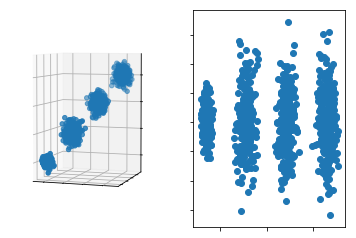

[ 0.98288449]
[ 3.80881392]
1
[ 0.98288449  0.00874633]
[ 3.80881392  0.03389325]
2
[ 0.98288449]
[ 3.80881392]
1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from matplotlib.ticker import NullFormatter

from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=1000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
fig = plt.figure()
# ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o', linewidths=1)
ax.view_init(4, -72)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.zaxis.set_major_formatter(NullFormatter())

pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)



pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)


X_new = pca.transform(X)
ax = fig.add_subplot(122)
ax.scatter(X_new[:, 0], X_new[:, 1],marker='o')
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())


plt.show()


pca = PCA(n_components=0.95)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)


pca = PCA(n_components=0.99)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)



pca = PCA(n_components = 'mle', svd_solver='full' )
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)



## 核化线性降维(KPCA)
为了对非线性数据进行合适的降维，可以采用一些非线性降维算法，比如KPCA。其思想是对于线性不可分的数据集，我们可以将其映射到高维上，再进行划分。

由PCA算法可以知道，假定将高维特征空间中的数据投影到由\\( W=(w_1, w_2,...,w_d) \\)确定的超平面上，则对于\\(w_j\\)， 有：
$$
(\sum_{i=1}^{m}z_iz_i^T)w_j=\lambda_jw_j
$$
其中，\\(z_i\\)是原始样本点\\(x_i\\)在高维特征空间中的像，可得：
$$
w_j=\frac {1}{\lambda_j}(\sum_{i=1}^{m}z_iz_i^T)w_j=\sum_{i=1}^{m}z_i\frac {z_i^Tw_j}{\lambda_j} \\
=\sum_{i=1}^{m}z_i\alpha_i^j
$$

其中\\(\alpha_i^j=\frac {z_i^Tw_j}{\lambda_j}\\)是\\(\alpha_i^j\\)的第j个分量。

如果我们能够显式的找到样本点和高维特征空间的映射关系\\(\phi\\)，满足\\(z_i=\phi(x_i) \\)，那么其实可以直接对高维样本点使用PCA即可：
$$
(\sum_{i=1}^{m}\phi(x_i)\phi(x_i)^T)w_j=\lambda_jw_j
$$

进而：
$$
w_j=\sum_{i=1}^{m}\phi(x_i)\alpha_i^j
$$
但常常情况是，我们不清楚\\(\phi\\)的具体形式，因此，这里引入核函数来规避具体\\(\phi\\)的形式：
$$
k(x_i,x_j)=\phi(x_i)^T\phi(x_i)
$$
将核函数带入到前面的两个式子中，可以得到：
$$
K\alpha^j=\lambda_j\alpha^j
$$
其中，\\(K_{ij}=k(x_i,x_j), \alpha^j=(\alpha_1^j;\alpha_1^j;。。。；\alpha_1^j)\\)

对于新样本x，其投影后的第j维坐标是：
$$
z_j = w_j^T\phi(x)=\sum_{i=1}^m\alpha_i^j\phi(x_i)^T\phi(x)
=\sum_{i=1}^m\alpha_i^jk(x_i,x)
$$
从上面的式子中可以看出，要求得投影后的坐标，需要对所有样本求和，因此计算开销较大。

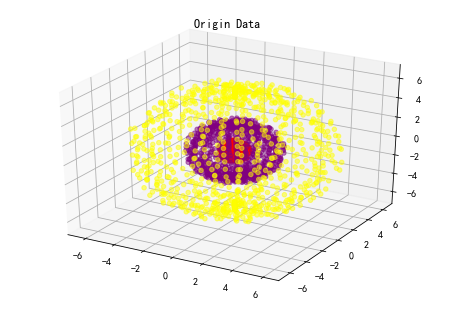

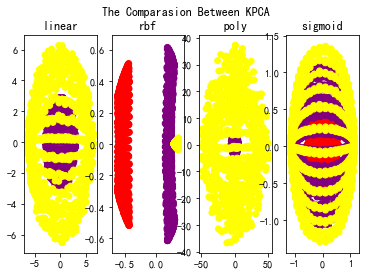

In [1]:
from time import time  
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib import colors  
from mpl_toolkits.mplot3d import Axes3D as ax3  
from sklearn import metrics  
from sklearn.cluster import KMeans  
from sklearn.datasets import load_digits,fetch_olivetti_faces,load_digits  
  
from sklearn.decomposition import PCA  
from sklearn.preprocessing import scale,StandardScaler  
from sklearn import decomposition  
from pylab import mpl  
mpl.rcParams['font.sans-serif']=['SimHei']  
mpl.rcParams['axes.unicode_minus']=False  
  
  
  
color=['red','purple','yellow']  
for i in colors.cnames:  
    if i in color:  
        pass  
    else:  
        color.append(i)  
  
  
def generate_circle_data3():  
    xx=np.zeros((2700,3))  
    x1=np.ones((900,))+0.5*np.random.rand(900)-0.5  
    r1=np.linspace(0,2*np.pi,30)  
    r2=np.linspace(0,np.pi,30)  
    r1,r2=np.meshgrid(r1,r2)  
    r1=r1.ravel()  
    r2=r2.ravel()  
    xx[0:900,0]=x1*np.sin(r1)*np.sin(r2)  
    xx[0:900,1]=x1*np.cos(r1)*np.sin(r2)  
    xx[0:900,2]=x1*np.cos(r2)  
    x1=3*np.ones((900,))+0.6*np.random.rand(900)-0.6  
    xx[900:1800,0]=x1*np.sin(r1)*np.sin(r2)  
    xx[900:1800,1]=x1*np.cos(r1)*np.sin(r2)  
    xx[900:1800,2]=x1*np.cos(r2)  
    x1=6*np.ones((900,))+1.1*np.random.rand(900)-0.6  
    xx[1800:2700,0]=x1*np.sin(r1)*np.sin(r2)  
    xx[1800:2700,1]=x1*np.cos(r1)*np.sin(r2)  
    xx[1800:2700,2]=x1*np.cos(r2)  
    target=np.zeros((2700,))  
    target[0:900]=0  
    target[900:1800]=1  
    target[1800:2700]=2  
    target=target.astype('int')  
    return xx,target    
  
def compare_KPCA():  
    data,target=generate_circle_data3()  
    pca=decomposition.PCA(n_components=2)  
    data1=pca.fit_transform(data)  
    try:  
        figure1=plt.figure(1)  
        ax=ax3(figure1)  
        ax.scatter3D(data[:,0],data[:,1],data[:,2],c=[color[i] for i in target],alpha=0.5)  
        plt.title('Origin Data')  
    except:  
        pass  
      
    figure2=plt.figure(2)  
    k=1  
    for kernel in ['linear','rbf','poly','sigmoid']:  
        plt.subplot(1,4,k)  
        k+=1  
        kpca=decomposition.KernelPCA(n_components=2,kernel=kernel)  
        data2=kpca.fit_transform(data)  
        plt.scatter(data2[:,0],data2[:,1],c=[color[i] for i in target])  
        plt.title(kernel)  
    plt.suptitle('The Comparasion Between KPCA')  
    plt.show()  
  
  
  
  
  
def bench_k_means(estimator, name, data,labels):  
    t0 = time()  
    estimator.fit(data)  
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'  
          % (name, (time() - t0), estimator.inertia_,  
             metrics.homogeneity_score(labels, estimator.labels_),  
             metrics.completeness_score(labels, estimator.labels_),  
             metrics.v_measure_score(labels, estimator.labels_),  
             metrics.adjusted_rand_score(labels, estimator.labels_),  
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),  
             metrics.silhouette_score(data, estimator.labels_,  
                                      metric='euclidean')))  
  
compare_KPCA()  

## 等度量映射(Iomap)
之前的MDS算法，保证样本点从高维映射到低维空间时，任意两点之间的欧式距离不变。但是在多维空间中，直接计算直线距离是不合适的。比如之前所画的S型曲面图，直接计算任意两点间的直线距离明显是不合理的。因此在Iomap算法中，使用测地线距离(geodesic，即可以理解为两点在曲面上的距离)来代替欧式距离。
根据常识可以知道，当两个点距离非常近的时候，那么欧式距离应该近似等于测地线距离，因此，对于每个样本点x，首先基于欧式距离，来找出去近邻点，进而可以建立起近邻连接图，默认非近邻点是不连接的。然后呢，计算任意两点之间的测地线距离其实就转变为了近邻图上面的最短路径问题，最短路径问题常用的算法无非就是Dijkstra或者Floyd算法。求得 人一两点的测地线距离后，再使用MDS方法进行降维即可。

### 算法描述：

---
输入:样本集\\(D={x_1,x_2,...,x_m}\\);  
    近邻参数k;  
    低维空间维度数\\(d^`\\)  
    
过程:\\(for i=1,2,...,m do\\)    
    确定\\(x_i\\)的k近邻;  
    \\(x_i\\)与其近邻点的距离设置为欧式距离，与其他点的距离设置为无穷大;  
    end for  
    调用最短路径算法计算任意两个样本点之间的距离矩阵\\(dist(x_i,x_j)\\);  
    调用MDS算法降维   
输出：MDS算法结果

---

### 如何处理新的样本点
上面的算法都是对训练集数据进行降维，那么针对新的样本点，如何获取低维坐标呢？ 目前的权宜之计是 把训练集的高维坐标作为输入，低维坐标作为输出，训练回归算法，来对新样本的低维坐标进行预测。

### 近邻图的构建方法与缺陷
1. 指定近邻个数。比如指定欧式距离最近的k个点作为近邻点。这种方式的问题在于，如果某个区域样本点很稀疏，则为了找到k个近邻点，可能会把相聚很远的点都当作近邻点，进而带来“短路”问题。
2. 指定距离阈值。小于一定距离的都认为是近邻点。这种方式的问题在于，如果某个区域样本点很稀疏，则在给定的距离阈值内，没有近邻点，进而带来所谓的“断路”问题。


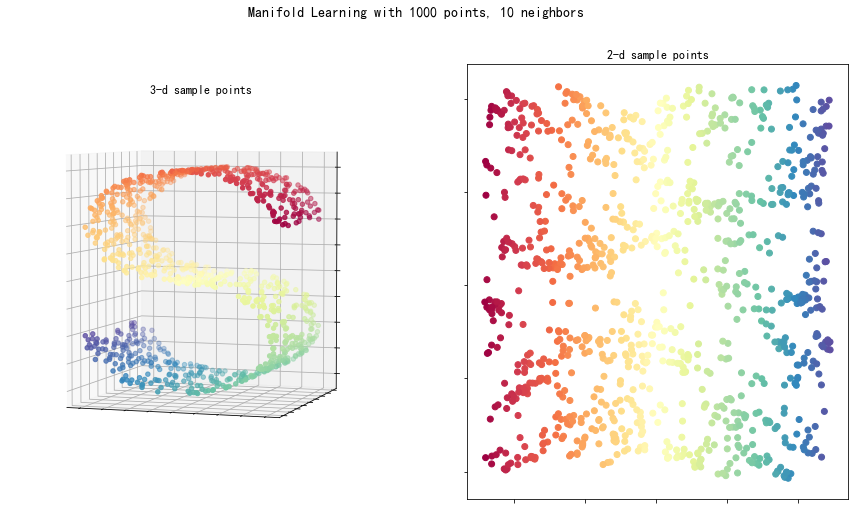

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title('3-d sample points')
ax.view_init(4, -72)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.zaxis.set_major_formatter(NullFormatter())


Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)


ax = fig.add_subplot(122)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_title('Isomap')
plt.axis('tight')

plt.show()

## 局部线性嵌入(Local Linear Embedding)

LLE算法包括三个步骤：

1. 寻找k个邻居
2. 寻找合适的权重，来用邻居线性近似的表示该点
3. 寻找使用之前确定的权重能够重建的最优的低围坐标

 
下面的描述中 \\( \overrightarrow {\alpha} \\) 表示行向量

---
   ### 算法描述： 
#### 输入： 
数据矩阵**X**, \\(n * p\\), 每行一个样本点, \\( \overrightarrow {x_i} \\)

需要降到的维度数：q, 要求q < p

每个点的邻居数k，要求 \\(k \ge q+1\\)

#### 输出：
结果矩阵**Y** , \\(n * q\\), 每行一个样本点, \\( \overrightarrow {y_i} \\)

#### 过程：
1. 为每个点寻找k个最近的邻居
2. 寻找权重矩阵**w**来最小化 使用这些权重重建\\( \overrightarrow {x_i} \\)时的RSS值。

$$ 
RSS(w)=\Sigma_{i=1}^{n}||\overrightarrow {x_i}-\Sigma_{j\ne i}w_{ij} \overrightarrow {x_j}||^2 \\
\forall i \qquad \Sigma_jw_{ij}=1 \\
$$
上式中，如果\\(\overrightarrow {x_j}\\)不是\\(\overrightarrow {x_i}\\)的k近邻，则\\(w_{ij}=0\\)。

3. 针对上面得到的**w**，寻找低维坐标**Y**来最小化重建误差：

$$
\Phi(Y)=\Sigma_{i=1}^{n}||\overrightarrow {y_i}-\Sigma_{j\ne i}w_{ij} \overrightarrow {y_j}||^2 \\
\forall j \quad \Sigma_iY_{ij}=0 \\
Y^TY=I
$$


---

### 寻找k近邻

寻找近邻原则上遵循两个原则：
1. 数据密度大的地方，可以选择的区域小一些。数据密度小的地方，区域大一些
2. 流形曲率大的地方，区域小一些，流形曲率小的地方，区域大一些


### 寻找合适的权重

\\(\Sigma_jw_{ij}=1\\)条件：从几何上面理解，添加这个限制条件，是为了保证坐标变换过程中的不变性。例如，如果给每个样本\\(\overrightarrow {x_i}\\)及它的邻居加上一个向量\\(\overrightarrow {c}\\)，相当于作了平移，则目标函数RSS其实是不受影响的：

$$
\overrightarrow {x_i}+\overrightarrow {c}-\Sigma_jw_{ij}(\overrightarrow {x_j}+\overrightarrow {c}) = \overrightarrow {x_i} + \overrightarrow {c} -(\Sigma_{j}w_{ij} \overrightarrow {x_j}) - \overrightarrow {c} \\
= \overrightarrow {x_i}-\Sigma_jw_{ij}\overrightarrow {x_j}
$$

这里目标函数的优化问题，其实是矩阵特征值问题。

#### k>p的情形
如果k>p， 则可以知道，使用\\(x_i\\)的k个邻居来线形表示\\(x_i\\)会有无穷多个解。通俗的理解就是 方程的个数p小于未知数的个数k，即线性方程组系数矩阵**w**是不满秩的。这样的优化问题被称作是病态的或者不规则的。一个常见的处理这类问题的手段是在目标函数中加入L2正则项，来限制**w**的值。
新的目标函数如下：
$$
\Sigma_{i=1}^{n}||\overrightarrow {x_i}-\Sigma_{j\ne i}w_{ij}\overrightarrow {x_j}||^2+\alpha\Sigma_jw_{ij}^2
$$

当\\(\alpha \rightarrow 0\\)的时候，上式就是最小二乘。
当\\(\alpha \rightarrow \inf\\)的时候，得到的解中，每个**w**分量都相同。
实际应用中，一般会选择α较小，但不是0，这样可以允许得到的权重解有些许变动


#### 寻找低维坐标表示

如果选择的邻居点相对于流形的曲率非常小，则嵌入空间的权重和流形中的权重应该是一样的。更准确说来，针对线性子空间，两者权重是一样的，针对其他流形，则通过不断缩小邻居的范围，可以将权重差别控制在任意小的范围内)

因此，在寻找低维坐标时，在上述找到的权重w下，应该令 使用这些低维坐标重建样本时，带来的误差最小：
$$
\Phi(Y)=\Sigma_{i=1}^{n}||\overrightarrow {y_i}-\Sigma_{j\ne i}w_{ij}\overrightarrow {y_j}||^2
$$

类似于上面给出的\\(\Sigma_jw_{ij}=1\\)条件的原因。这里在求解最优化问题时，存在无限多种同样好的Y值。因为无论给Y加上什么向量，上面的\\(\Phi(Y)\\)都不变。为了解决这种问题，我们添加了下面的限制条件：
$$
\frac {1}{n}\Sigma_i \overrightarrow {y_i}=0
$$

除此之外，我们还施加了下面的限制：

$$
\frac {1}{n}Y^TY=I
$$
这个限制条件要求Y的协方差矩阵是单位阵。事实上，如果最终解Y的协方差矩阵不是对角矩阵，则等价的可以在流形空间上面使用PCA变换来得到一组新的相互无关的坐标，对应的协方差矩阵是对角阵。因此，这里的限制条件 其实就只是限制了所有坐标的方差都相同而已。
这里的优化问题也可以使用拉格朗日乘子法来求解，最终也归结为矩阵特征值问题。


#### 求解
运用之前提到的变换过程中的不变性，可以得到：
$$
RSS_i(w)=||\overrightarrow {x_i}-\Sigma_{j\ne i}w_{ij} \overrightarrow {x_j}||^2 \\
=||\Sigma_jw_{ij}(\overrightarrow {x_j} - \overrightarrow {x_i})||^2 \\
=||\Sigma_jw_{ij} \overrightarrow {z_j}||^2
$$
上式中，令\\(\overrightarrow {z_j} = \overrightarrow {x_j} - \overrightarrow {x_i}\\)。定义矩阵**z**，维度为k*p, 其中\\(\overrightarrow {z_j}\\)代表 **z** 中第j个行向量。记\\(w_i\\) 为k * 1矩阵，则：
$$
RSS_i = w_i^Tzz^Tw_i
$$

\\(zz^T\\)是一个k * k的矩阵，包含了所有邻居节点的内积。这个对称矩阵被称为格拉姆矩阵（Gram matrix），此处记为**G**。进而得到：
$$
RSS_i = w_i^TG_iw_i
$$

为求上式最小值，采用拉格朗日乘子法：
$$
\mathcal{L(w_i,\lambda)} = w_i^TG_iw_i-\lambda(1^Tw-1)
$$

分别对\\(w_i \quad \lambda\\) 求偏导可得：
$$
\frac {\partial \mathcal{L}}{\partial w_i} = 2G_iw_i-\lambda1=0 \\
\frac {\partial \mathcal{L}}{\partial \lambda} = 1^Tw_i-1=0 \\
or \\
G_iw_i=\frac {\lambda}{2}1
$$

如果**G**可逆，则
$$
w_i=\frac {\lambda}{2}G_i^{-1}1
$$

#### 针对\\(k \gt p\\)的情况

$$
\mathcal{L(w_i,\lambda)} = w_i^TG_iw_i + \alpha w_i^Tw_i - \lambda(1^Tw-1)
$$
对变量\\(w_i \; \alpha \; \lambda\\)求偏导可得：
$$
w_i = \frac{\lambda}{2}(G_i+\alpha I)^{-1}1
$$

### 寻找低维坐标

这里为了简便，先考虑q=1的情形，这是Y退化为\\(n \times 1\\)矩阵，\\(\overrightarrow {y_i}\\)退化为标量\\({y_i}\\)

目标函数为
$$
\Phi(Y)=\sum_{i=1}^{n}(y_i-\sum_jw_{ij}y_j)^2 \\
=\sum_{i=1}^{n}y_i^2-y_i(\sum_jw_{ij}y_j)-(\sum_jw_{ij}y_j)y_i+(\sum_jw_{ij}y_j)^2 \\
=Y^TY-Y^T(wY)-(wY)^TY+(wY)^T(wY) \\
=((I-w)Y)^T((I-w)Y) \\
=Y^T(I-w)^T(I-w)Y \\
\; \\
define \qquad M=(I-w)^T(I-w) \\
\Rightarrow \\
\Phi(Y)=Y^TMY \\
$$

运用拉格朗日乘子法求解上面的式子：
$$
\mathcal{L}(Y,\mu)=Y^TMY-\mu(n^{-1}Y^TY-1) \\
\Rightarrow \\
MY=\frac {\mu}{n}Y
$$

显然这又是一个矩阵特征值求解问题。由于这里是最小化目标函数，因此此处要选择小的特征值。矩阵M是实对称矩阵，因此是半正定的。针对这里的q=1的情况，选择最小的特征值，但可以发现，最小的特征值为0，对应的特征向量为1，对于所有的样本点，该维度的值都是1，无意义。因此丢弃这个特征值，选择第二小的特征值对应的特征向量作为当前维度的坐标。推广到q>1的情况，选择最小的q+1个特征值对应的特征向量，然后丢弃特征值0对应的特征向量。


另外，上面应用拉格朗日乘子法求解时，未考虑 之前提到的 Y的均值为0的限制条件。如果加上这个限制条件，则拉格朗日乘子变为：

$$
\mathcal{L}(Y,\mu, \nu)=Y^TMY-\mu(n^{-1}Y^TY-1) - \nu AY \\
\Rightarrow \\
\frac {\partial \mathcal{L}(Y,\mu, \nu)}{\partial Y}=2MY-2\mu Y-\nu A=0
$$

参数\\(\nu\\)仅仅在上面这个方程中出现，无论取什么值，都不影响最终的结果。这里为了计算令\\(\nu=0\\)






standard: 0.14 sec
ltsa: 0.23 sec
hessian: 0.35 sec
modified: 0.28 sec


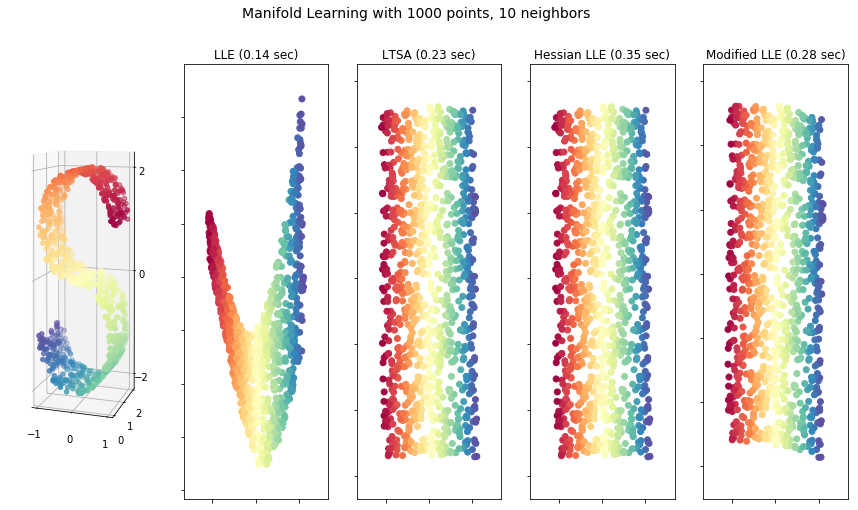

In [2]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(151, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(152 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
             
plt.show()

## 度量学习（metric learning）
降维的本质，可以看作是在低维空间中找到一种合适的距离度量，来表示高维中的样本点，尽可能的维持原本的高维数据点之间的结构特征。因此，度量学习算法致力于寻找出一个合适的低维空间中的距离度量。

对于d维的样本点\\(x_i,x_j\\)，他们之间的欧式距离为：
$$
dist_{ed}^2(x_i,x_j)=||x_i-x_j||_2^2=dist_{ij,1}^2+dist_{ij,2}^2+...+dist_{ij,d}^2
$$
其中\\(dist_{ij,k}^2\\)表示两个样本点在第k维上的距离。如果我们假定，在降维的时候，每个维度上的距离的重要性不同，进而引入属性权重w, 则：
$$
dist_{ed}^2(x_i,x_j)=||x_i-x_j||_2^2=w_1 dist_{ij,1}^2+w_2dist_{ij,2}^2+...+w_ddist_{ij,d}^2 \\
=(x_i-x_j)^TW(x_i-x_j)
$$
其中W是对角矩阵，对角线元素就是w。
由于W是对角矩阵，意味着坐标轴是正交的，也就是说不同属性之间不相关。但实际中，不同属性之间完全有可能是相关的，比如西瓜的“重量”和“体积”这两个属性就是相关的。为了表示这种更一般化的情况，将上面的矩阵W替换为一个普通的半正定对称矩阵M，于是就得到了所谓的马氏距离：
$$
dist_{mah}^2(x_i,x_j)=(x_i-x_j)^TW(x_i-x_j)=||x_i-x_j||_M^2
$$
为了保证距离是非负的且对称的，因此M是半正定的对称矩阵。即有正交基P满足\\(M=PP^T\\)
要学习M，就需要设置一个目标，这里，我们可以将M嵌入到近邻分类器的评价指标中去，通过优化这个近邻分类器的评价指标来获得M。下面以近邻成分分析(NCA)为例进行讨论。

近邻分类器 在对一个样本的类别进行判别时，通常是采用多数投票法，近邻点每个点投一票，其他非近邻点投0票。在这里，为了将我们刚才提到的马氏距离嵌入到近邻分类器的优化目标中，我们将投票方式替换为概率投票法：对于任意的样本\\(x_j\\)，他对样本\\(x_i\\)的分类结果的影响概率为：
$$
p_{ij}=\frac {exp(-||x_i-x_j||_M^2)}{\Sigma_lexp(-||x_i-x_l||_M^2)}
$$
显然，\\(x_j\\)对\\(x_i\\)的影响随着他们之间距离的增大而减小。对于任意一个样本\\(x_i\\)，其被正确分类的概率为：
$$
p_i=\sum_{j \in \Omega_i}p_{ij}
$$
进而，整个样本集中，能够被正确分类的样本点数为：
$$
\sum_{i=1}^mp_i=\sum_{i=1}^m\sum_{j \in \Omega_i}p_{ij}
$$
在考虑到\\(M=PP^T\\)，因此最终的优化目标为：
$$
\max \limits_{P} \sum_{i=1}^m\sum_{j \in \Omega_i}\frac {exp(-||P^Tx_i-P^Tx_j||_2^2)}{\Sigma_lexp(-||P^Tx_i-P^Tx_l||_2^2)}
$$

上面是将分类学习器的正确率作为优化目标，但这并非是唯一方法。比如考虑另外一种方式， 若一直某些样本相似，而另一些不相似，那么可以定义“必连”(must-link)和“勿连”(cannot-link)约束集合。\\((x_i,x_j) \in \mathcal{M} \\)表示两样本点相似，\\((x_i,x_j) \in \mathcal{C} \\)表示两样本点不相似。显然，我们希望相似的样本点之间距离小，而不相似的样本点之间距离大。 于是得到下面的优化目标：
$$
\min \limits_{M} \sum_{(x_i,x_j) \in \mathcal{M}}||x_i-x_j||_M^2 \\
s.t. \sum_{(x_i,x_j) \in \mathcal{M}}||x_i-x_j||_M^2 \ge 1 \\
M \succeq 0
$$
其中\\(M \succeq 0\\)表示M是半正定的。上面式子在保证不相似样本间距不小于1的前提下，令相似样本的距离尽可能的小。

求得矩阵M之后，如何降维呢？其实，如果M是一个低秩矩阵，则对它进行特征值分解，总能找到一组正交基，其数目小于原来的属性数d，对应的得到一个降维矩阵\\(P \in R^{d \times rank(M)}\\)。
